# Несколько примеров использования Numpy

1. Письменный экзамен оказался слишком сложным, и преподаватель решил добавить каждому студенту не менее некоторого количества очков, чтобы в итоге было поменьше плохих оценок. Поможем ему пересчитать первичные баллы в итоговые.

Импортируем библиотеку Numpy:

In [4]:
import numpy as np

Зададим среднее значение итоговых баллов:

In [5]:
CURVE_CENTER = 80

Создадим массив оценок:

In [6]:
grades = np.array([72, 35, 64, 88, 51, 90, 74, 12])

Напишем функцию, которая осуществляет пересчёт:

In [7]:
def curve(grades):
    average = grades.mean() # определяем средний первичный балл
    change = CURVE_CENTER - average # определяем количество добавляемое количество очков
    new_grades = grades + change # добавляем это количество очков
    return np.clip(new_grades, grades, 100)

Рассмотрим последнюю строку. Если новая оценка оказалась меньше старой, заменяем её на старую, а если больше 100 - то заменяем на 100. Вызовем функцию:

In [8]:
print(curve(grades))

[ 91.25  54.25  83.25 100.    70.25 100.    93.25  31.25]


## Упражнение 1

В файле `melting.txt` приведены значения флуоресценции различных образцов в диапазоне температур от 28 до 95 градусов. Сами эти абсолютные значения не слишком интересуют исследователей: важнее форма кривых. Чтобы было удобнее сравнивать кривые между собой, отнормируйте их (минимальное значение - 0, максимальное - 1, промежуточное значение делится на разницу между максимальным и минимальным значением). Постройте графики получившихся кривых.

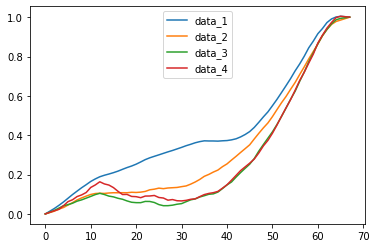

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def norm(data_x):
    data_temp = []
    for i in range(len(data_x)):
        data_temp.append((data_x[i] - data_x[0])/(data_x[len(data_x) - 1] - data_x[0]))
    return(data_temp)

fluo = open(r'C:\Users\lygun\Downloads\B06-107-Spring-Lab3\melting.txt')
data_1 = []
data_2 = []
data_3 = []
data_4 = []
for line in fluo: 
    if line.split("\t")[0] != "t":
        data_1.append(float(line.split('\t')[1]))
        data_2.append(float(line.split('\t')[2]))
        data_3.append(float(line.split('\t')[3]))
        data_4.append(float(line.split('\t')[4]))
        
plt.plot(norm(data_1), label='data_1') 
plt.plot(norm(data_2), label='data_2') 
plt.plot(norm(data_3), label='data_3') 
plt.plot(norm(data_4), label='data_4') 
leg = plt.legend(loc='upper center')

plt.show()

# 2. Изменение формы массива, многомерные массивы

Массив не обязан иметь форму 1×n, то есть быть просто последовательностью чисел. Можно использовать многомерные массивы. Создадим массив от 1 до 24:

In [9]:
twentyfour = np.arange(1, 25, 1)
twentyfour

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

Создадим на его основе трёхмерный массив:

In [38]:
twentyfour = np.arange(1, 25, 1)
three_d = twentyfour.reshape(2, 3, 4)
three_d

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]])

Вычислим среднее значение трёхмерного массива:

In [13]:
three_d.mean()

12.5

Вычислим средние от соответствующих значений первого и второго 2D-массивов, входящих в состав 3D-массива:

In [41]:
three_d.mean(axis=0)

array([[ 7.,  8.,  9., 10.],
       [11., 12., 13., 14.],
       [15., 16., 17., 18.]])

Вычислим средние от каждого столбца 2D-массивов, входящих в состав 3D-массива:

In [15]:
three_d.mean(axis=1)

array([[ 5.,  6.,  7.,  8.],
       [17., 18., 19., 20.]])

Вычислим средние от каждой строки 2D-массивов, входящих в состав 3D-массива:

In [16]:
three_d.mean(axis=2)

array([[ 2.5,  6.5, 10.5],
       [14.5, 18.5, 22.5]])

## Упражнение 2

Прочитайте файлы `ex2_1.txt` и `ex2_2.txt` в двумерный массив, вычислите среднее по каждому столбцу. Читая файлы, исходите из предположения, что количество столбцов в файле заранее неизвестно. Числа в строке разделены табуляцией.

In [23]:
import numpy as np
import matplotlib.pyplot as plt

ex2_1 = open(r'C:\Users\lygun\Downloads\B06-107-Spring-Lab3\ex2_1.txt')
ex2_2 = open(r'C:\Users\lygun\Downloads\B06-107-Spring-Lab3\ex2_2.txt')
data_1 = []
data_2 = []
for line in ex2_1: 
        data_1.append([int(i) for i in line.split('\t')])
        
for line in ex2_2: 
        data_2.append([int(i) for i in line.split('\t')])
        
print(np.array(data_1).mean(axis=0))
print(np.array(data_2).mean(axis=0))

[50.35 58.65 50.55 45.35 57.4 ]
[39.61111111 55.5        51.55555556 53.55555556 49.94444444 58.5       ]


3. Взятие элементов по индексу

Можно создавать массивы-"срезы" на основании имеющихся массивов:

In [18]:
print(three_d[0, ::2,]) # взяли первый 2D-массив из 3D-массива, вытащили нечётные строки полностью

[[ 1  2  3  4]
 [ 9 10 11 12]]


In [21]:
print(three_d[:, 1:, 1:]) # в каждом из 2D-массивов отбросили первую строку и первый столбец

[[[ 6  7  8]
  [10 11 12]]

 [[18 19 20]
  [22 23 24]]]


## Упражнение 3

Задан двумерный массив:

```
square = np.array([
    [16, 3, 2, 13],
    [5, 10, 11, 8],
    [9, 6, 7, 12],
    [4, 15, 14, 1]
])
```
Вычислите сумму чисел в каждом столбце, в каждой строке, в каждом квадрате 2×2, который можно вырезать из имеющегося (5 шт). Выведите её на экран для каждого случая.

In [46]:
square = np.array([
    [16, 3, 2, 13],
    [5, 10, 11, 8],
    [9, 6, 7, 12],
    [4, 15, 14, 1]
])

print(square.mean(axis = 0))
print(square.mean(axis = 1))
print(square[0:2,:2, ].mean())
print(square[0:2,2:, ].mean())
print(square[2:4,:2, ].mean())
print(square[2:4,2:, ].mean())
print(square[1:3,1:3, ].mean())

[8.5 8.5 8.5 8.5]
[8.5 8.5 8.5 8.5]
8.5
8.5
8.5
8.5
8.5


4. Фильтрация массива

В некоторых случаях требуется выбрать элементы не по индексу, а по какому-то признаку, например, делимость на 3. Для этого можно создать массив-маску. Он имеет ту же форму, что и исходный массив, однако содержит булевские значения (`True`/`False`)

Создадим случайный массив 4×3 и получим маску по условию "делится на 3":

In [24]:
rnd_array = np.random.randint(0, 21, size=(4, 3))
print(rnd_array)

mask = rnd_array % 3 == 0
print(mask)

[[ 1  4 19]
 [14 11  4]
 [ 4 15  5]
 [10  7  4]]
[[False False False]
 [False False False]
 [False  True False]
 [False False False]]


In [25]:
rnd_array[mask]

array([15])

## Упражнение 4

Вычислите среднее и стандартное отклонение чисел из файла `ex4.txt`, затем найдите выбросы (*x* < *Q*1 - 1.5 × *IQR* или *x* > *Q*3 + 1.5 × *IQR*  и вычислите среднее и стандартное отклонение без них.

In [79]:
ex4 = open(r'C:\Users\lygun\Downloads\B06-107-Spring-Lab3\ex4.txt')
data = []

for line in ex4: 
        data.append(int(line))
print('среднее:', str(np.mean(data)), '\nстандартное отклонение:', np.std(data))

data.sort()
x = [i for i in np.quantile(data, [0.25,0.5,0.75])]
new_data = []
for i in data:
    if i > (x[0] - 1.5 * (x[2] - x[0])) and i < (x[2] + 1.5 * (x[2] - x[0])):
            new_data.append(i)
print('среднее_2:', str(np.mean(new_data)), '\nстандартное отклонение_2:', np.std(new_data))

среднее: 4382.08 
стандартное отклонение: 1816.365239041972
среднее_2: 5071.064814814815 
стандартное отклонение_2: 572.7614601590126
